In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
d=pd.read_excel("fifa_cleaned.xlsx")

In [3]:
# Convert the column to string data type
d['club_team'] = d['club_team'].astype(str)
d['contract_end_year'] = d['contract_end_year'].astype(str)
d['full_name'] = d['full_name'].astype(str)
d['club_position'] = d['club_position'].astype(str)
d['national_team'] = d['national_team'].astype(str)
d['national_team_position'] = d['national_team_position'].astype(str)
d['tags'] = d['tags'].astype(str)
d['traits'] = d['traits'].astype(str)
d['nationality'] = d['nationality'].astype(str)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

d['name'] = le.fit_transform(d['name'])
d['full_name'] = le.fit_transform(d['full_name'])
d['preferred_foot'] = le.fit_transform(d['preferred_foot'])
d['positions'] = le.fit_transform(d['positions'])
d['nationality'] = le.fit_transform(d['nationality'])
d['work_rate'] = le.fit_transform(d['work_rate'])
d['body_type'] = le.fit_transform(d['body_type'])
d['club_team'] = le.fit_transform(d['club_team'])
d['work_rate'] = le.fit_transform(d['work_rate'])
d['club_position'] = le.fit_transform(d['club_position'])
d['contract_end_year'] = le.fit_transform(d['contract_end_year'])
d['national_team'] = le.fit_transform(d['national_team'])
d['national_team_position'] = le.fit_transform(d['national_team_position'])
d['tags'] = le.fit_transform(d['tags'])
d['traits'] = le.fit_transform(d['traits'])

In [5]:
print(d.isnull().sum())
print(d.isin([np.inf, -np.inf]).sum())

# Replace null and infinity values with 0
d.fillna(d.mean(), inplace=True)
# Replace infinity values with a large number such as 1e+9
d.replace([np.inf, -np.inf], 1e+9, inplace=True)

id              0
name            0
full_name       0
age             0
height_cm       0
             ... 
lb           2065
lcb          2065
cb           2065
rcb          2065
rb           2065
Length: 90, dtype: int64
id           0
name         0
full_name    0
age          0
height_cm    0
            ..
lb           0
lcb          0
cb           0
rcb          0
rb           0
Length: 90, dtype: int64


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Identify the target variable and features
target_variable = 'overall_rating'  
feature_names = [ 'crossing', 'finishing','curve','agility']  
# Split the dataset into features and target variable
x = d[feature_names]
y = d[target_variable]
# Remove outliers in the features
for col in ['crossing', 'finishing', 'curve', 'agility']:
    d = d[(d[col] >= d[col].quantile(0.01)) & (d[col] <= d[col].quantile(0.99))]

# Remove outliers in the target variable
d = d[(d['overall_rating'] >= d['overall_rating'].quantile(0.01)) & (d['overall_rating'] <= d['overall_rating'].quantile(0.99))]

# Separate features and target variable
x = d.drop(['overall_rating'], axis=1)
y = d['overall_rating']

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Select the best features using f_regression
selector = SelectKBest(f_regression, k=10)
x_selected = selector.fit_transform(x_scaled, y)

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_selected)
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33, random_state=42) 
#Fitting the Simple Linear Regression model to the training dataset  
r= LinearRegression()  
r.fit(x_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
# Predict the test set results
y_pred= r.predict(x_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)


# Display the regression score
print('Regression score:', r2)

Regression score: 0.962352682841519


In [8]:
from sklearn.ensemble import BaggingClassifier

In [9]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [10]:
# Identify the target variable and features
target_variable = 'overall_rating'  
feature_names = ['crossing', 'finishing','curve','agility']  
# Split the dataset into features and target variable
x = d[feature_names]
y = d[target_variable]

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [12]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [13]:
bag_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",bag_model.oob_score_)

Accuracy: 0.7529740447007931


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = d.drop(['overall_rating'], axis=1)
y = d['overall_rating']
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))

                  Specs         Score
17  release_clause_euro  1.165176e+11
9            value_euro  6.325755e+10
10            wage_euro  1.807686e+08
0                    id  1.095180e+07
62               traits  3.667437e+05
2             full_name  1.724658e+05
75                  lcm  1.301133e+05
76                   cm  1.301133e+05
77                  rcm  1.301133e+05
80                  ldm  1.252482e+05


In [16]:
# Create Random Forest Classifier object
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.716794731064764


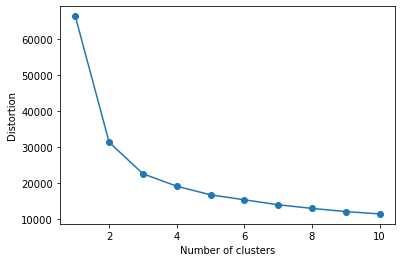

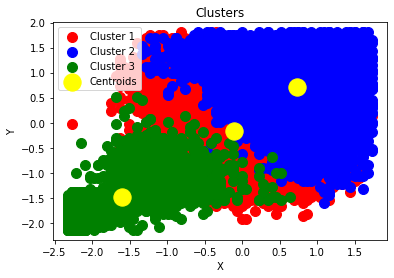

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Identify the features to be used for clustering
features = ['crossing', 'finishing', 'curve', 'agility']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(d[features])

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = d.drop(['overall_rating'], axis=1)
y = d['overall_rating']
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))

                  Specs         Score
17  release_clause_euro  1.165176e+11
9            value_euro  6.325755e+10
10            wage_euro  1.807686e+08
0                    id  1.095180e+07
62               traits  3.667437e+05
2             full_name  1.724658e+05
75                  lcm  1.301133e+05
76                   cm  1.301133e+05
77                  rcm  1.301133e+05
80                  ldm  1.252482e+05


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Train and fit the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
# Predict the target variable using the test set and calculate the accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy:0.25429930479326746


In [20]:
# Create a bagging classifier object with Naive Bayes as the base estimator
bag_clf = BaggingClassifier(
    base_estimator=clf, 
    n_estimators=100, 
    max_samples=0.8, 
    bootstrap=True,
    oob_score=True,
    random_state=0)

# Train the bagging classifier
bag_clf.fit(X, y)

# Compute the out-of-bag score
print("Accuracy:",bag_clf.oob_score_)

Accuracy:0.8432556454534477
